# PCA Analysis for S&P500 stocks (2024Y)

## Preprocess Data

In [1]:
!pip install kagglehub seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/s-and-p500-index-stocks-daily-updated")

print("Path to dataset files:", path)

Path to dataset files: /Users/hermankhivrenko/.cache/kagglehub/datasets/joebeachcapital/s-and-p500-index-stocks-daily-updated/versions/484


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(path + "/sp500_data.csv")
df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume 2017-02-01,INVH,16.15614128112793,20.0,20.420000076293945,19.799999237060547,20.100000381469727,30833000
0,2017-02-02,INVH,16.341938,20.230000,20.410000,20.040001,20.040001,4901200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-03,INVH,16.665054,20.629999,20.799999,20.299999,20.350000,2631500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-06,INVH,16.745840,20.730000,21.139999,20.549999,21.139999,1836800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-02-07,INVH,16.802383,20.799999,20.860001,20.620001,20.750000,3521100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-02-08,INVH,16.834702,20.840000,20.920000,20.730000,20.799999,973600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2024 = df[df["Date"].str.startswith("2024-")]
df_2024.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume 2017-02-01,INVH,16.15614128112793,20.0,20.420000076293945,19.799999237060547,20.100000381469727,30833000
1739,2024-01-02,INVH,32.593124,34.619999,34.830002,34.049999,34.279999,2504400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,2024-01-03,INVH,32.075329,34.070000,34.365002,33.900002,34.320000,2459300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,2024-01-04,INVH,31.990599,33.980000,34.180000,33.770000,33.959999,2608800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,2024-01-05,INVH,31.877619,33.860001,34.189999,33.540001,33.889999,2277000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,2024-01-08,INVH,32.225960,34.230000,34.345001,33.779999,33.779999,2786000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
close_df = df_2024.pivot(index='Date', columns='Ticker', values='Close')
close_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,XYZ,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,138.750000,13.440000,61.950001,185.639999,159.820007,134.479996,109.849998,75.550003,346.920013,580.070007,...,63.470001,102.360001,35.630001,113.669998,72.220001,129.029999,121.389999,267.980011,44.139999,196.570007
2024-01-03,131.160004,12.950000,61.000000,184.250000,160.460007,133.419998,109.519997,76.940002,337.920013,571.789978,...,63.580002,103.220001,34.820000,111.559998,68.629997,129.100006,120.470001,252.520004,42.000000,192.929993
2024-01-04,131.000000,13.090000,60.490002,181.910004,161.460007,133.720001,110.980003,77.470001,337.089996,567.049988,...,63.730000,102.320000,35.680000,112.330002,68.150002,128.690002,120.199997,252.970001,42.639999,194.039993
2024-01-05,130.559998,13.600000,61.520000,181.179993,162.139999,135.979996,110.800003,76.809998,336.619995,564.599976,...,63.730000,102.629997,35.380001,112.150002,66.959999,128.339996,119.980003,252.690002,44.049999,194.850006
2024-01-08,133.380005,14.580000,61.910000,185.559998,161.429993,140.080002,112.400002,77.120003,340.350006,580.549988,...,63.580002,100.919998,35.900002,112.849998,69.309998,128.639999,121.970001,261.089996,44.540001,196.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,136.100006,17.350000,43.730000,258.200012,180.000000,134.990005,114.760002,92.669998,361.630005,447.940002,...,68.209999,106.400002,18.900000,118.150002,91.080002,135.000000,107.300003,395.440002,54.970001,164.699997
2024-12-26,135.830002,17.350000,44.240002,259.019989,179.199997,135.320007,115.269997,92.930000,360.429993,450.160004,...,68.180000,106.489998,19.160000,118.470001,91.480003,136.000000,107.250000,396.850006,55.349998,165.520004
2024-12-27,135.539993,17.350000,44.060001,255.589996,178.009995,133.384995,114.989998,92.339996,356.179993,446.480011,...,68.139999,106.480003,18.940001,117.529999,88.970001,135.229996,106.870003,389.070007,54.680000,164.600006


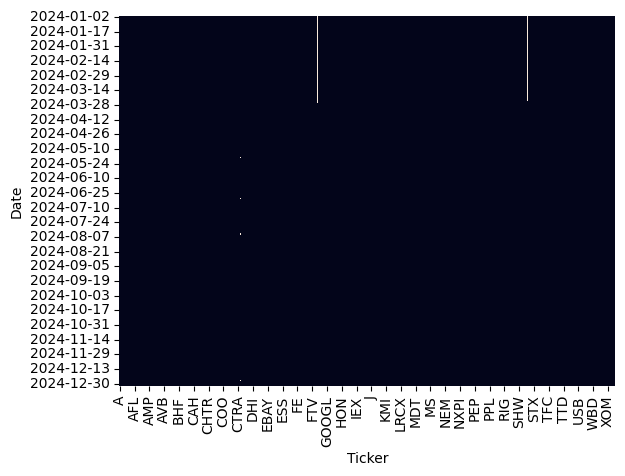

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(close_df.isnull(), cbar=False)
plt.show()

In [8]:
missing_tickers = close_df.isnull().sum()
missing_tickers = missing_tickers[missing_tickers > 0]

print(missing_tickers)

close_df.drop(columns=missing_tickers.index, inplace=True)
print(close_df.isnull().values.any()) # make sure we have no missing values

Ticker
CVG       4
GEV      59
INFO    195
SOLV     58
dtype: int64
False


In [9]:
returns_df = np.log(close_df / close_df.shift(1)).dropna()
returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XYL,XYZ,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,-0.056256,-0.037140,-0.015454,-0.007516,0.003997,-0.007913,-0.003009,0.018231,-0.026285,-0.014377,...,0.001732,0.008367,-0.022996,-0.018737,-0.050987,0.000542,-0.007608,-0.059422,-0.049697,-0.018691
2024-01-04,-0.001221,0.010753,-0.008396,-0.012781,0.006213,0.002246,0.013243,0.006865,-0.002459,-0.008324,...,0.002356,-0.008757,0.024398,0.006878,-0.007019,-0.003181,-0.002244,0.001780,0.015123,0.005737
2024-01-05,-0.003364,0.038221,0.016884,-0.004021,0.004203,0.016760,-0.001623,-0.008556,-0.001395,-0.004330,...,0.000000,0.003025,-0.008444,-0.001604,-0.017616,-0.002723,-0.001832,-0.001107,0.032533,0.004166
2024-01-08,0.021369,0.069581,0.006319,0.023887,-0.004389,0.029706,0.014337,0.004028,0.011020,0.027858,...,-0.002356,-0.016802,0.014591,0.006222,0.034494,0.002335,0.016450,0.032702,0.011062,0.006650
2024-01-09,-0.020451,-0.013812,-0.008435,-0.002266,0.005437,-0.003934,0.002932,-0.012658,0.007027,0.009685,...,-0.004888,-0.012463,0.017396,-0.006579,0.003169,-0.003270,-0.000820,-0.017970,-0.011289,-0.001071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011082,0.005780,-0.000457,0.011413,0.008985,0.003488,0.003929,0.006278,0.007940,0.002683,...,0.007210,0.000940,-0.002642,0.005432,0.019849,0.008480,0.004484,0.012187,0.010791,0.002553
2024-12-26,-0.001986,0.000000,0.011595,0.003171,-0.004454,0.002442,0.004434,0.002802,-0.003324,0.004944,...,-0.000440,0.000845,0.013663,0.002705,0.004382,0.007380,-0.000466,0.003559,0.006889,0.004966
2024-12-27,-0.002137,0.000000,-0.004077,-0.013331,-0.006663,-0.014403,-0.002432,-0.006369,-0.011862,-0.008208,...,-0.000587,-0.000094,-0.011549,-0.007966,-0.027821,-0.005678,-0.003549,-0.019799,-0.012179,-0.005574


### Center data

In [10]:
# Center around 0 using mean
R = returns_df.values
Rc = R - np.mean(R, axis=0)
Rc

array([[-0.05612709, -0.03817522, -0.01437794, ..., -0.06087808,
        -0.05051843, -0.01794345],
       [-0.00109197,  0.00971713, -0.00731996, ...,  0.00032428,
         0.01430149,  0.0064847 ],
       [-0.00323577,  0.03718554,  0.01796005, ..., -0.00256361,
         0.03171091,  0.00491358],
       ...,
       [-0.00200868, -0.00103569, -0.00300121, ..., -0.02125525,
        -0.01300027, -0.00482593],
       [-0.00816885,  0.01440645,  0.04525119, ..., -0.01496358,
        -0.0074272 , -0.01369377],
       [-0.00046666, -0.01187748,  0.02764694, ...,  0.00469914,
        -0.00211114,  0.00499166]], shape=(251, 566))

### Build covariance matrix

$$
\begin{flalign*}
\Sigma = \frac{1}{n-1} R_c^\top R_c
&&
\end{flalign*}
$$

In [11]:
cov_matrix = (Rc.T @ Rc) / (Rc.shape[0] - 1)

print(cov_matrix.shape) # square matrix
print(cov_matrix)

(566, 566)
[[2.71592836e-04 7.13794544e-05 1.01682096e-04 ... 1.16587514e-04
  7.03113033e-05 8.28810896e-05]
 [7.13794544e-05 7.67300678e-04 2.13955424e-04 ... 1.80226635e-04
  2.21035509e-04 7.39652461e-05]
 [1.01682096e-04 2.13955424e-04 8.65189421e-04 ... 1.04081340e-04
  1.43198209e-04 5.09386503e-05]
 ...
 [1.16587514e-04 1.80226635e-04 1.04081340e-04 ... 3.66585170e-04
  1.86818244e-04 9.39598893e-05]
 [7.03113033e-05 2.21035509e-04 1.43198209e-04 ... 1.86818244e-04
  5.06389605e-04 4.66197360e-05]
 [8.28810896e-05 7.39652461e-05 5.09386503e-05 ... 9.39598893e-05
  4.66197360e-05 2.51088916e-04]]


### Eigen decomposition

In [12]:
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# sort eigenvalues in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:", eigvals)
print("Eigenvectors shape:", eigvecs.shape)

Eigenvalues: [ 4.39126650e-02  1.37405268e-02  8.71030794e-03  7.89325422e-03
  6.26011046e-03  5.32789201e-03  4.83159668e-03  4.30577113e-03
  3.97969992e-03  3.61479173e-03  3.45957117e-03  3.29266713e-03
  2.99574659e-03  2.80284009e-03  2.74328660e-03  2.65367807e-03
  2.61935042e-03  2.42458842e-03  2.27132423e-03  2.16243269e-03
  2.12709211e-03  1.97787790e-03  1.96581350e-03  1.87606733e-03
  1.80747997e-03  1.76180496e-03  1.70267431e-03  1.64607747e-03
  1.59228757e-03  1.52722960e-03  1.51506411e-03  1.45776913e-03
  1.43841062e-03  1.41266431e-03  1.38681900e-03  1.36946355e-03
  1.31046330e-03  1.28247045e-03  1.27123336e-03  1.22330839e-03
  1.19569722e-03  1.17546238e-03  1.13905061e-03  1.12321988e-03
  1.10036252e-03  1.07677892e-03  1.06379716e-03  1.01523569e-03
  1.00181414e-03  9.97362781e-04  9.71238145e-04  9.55527466e-04
  9.38794762e-04  9.34112687e-04  9.07078816e-04  8.91103282e-04
  8.87433780e-04  8.68188442e-04  8.59514847e-04  8.44472721e-04
  8.27570398

### Project data onto principal components 

In [13]:
k = 5  # number of PCs to keep

In [14]:
explained_variance_ratio = eigvals[:k] / eigvals.sum()
pc_scores = Rc @ eigvecs[:, :k]

In [15]:
pc_scores_df = pd.DataFrame(
    pc_scores,
    index=returns_df.index,
    columns=[f'PC{i+1}' for i in range(k)]
)

pc_scores_df.head()

,PC1,PC2,PC3,PC4,PC5
Date,,,,,
2024-01-03,-0.423723,-0.057277,0.117030,-0.097569,-0.036019
2024-01-04,-0.031743,-0.005098,-0.015536,0.025493,0.060118
2024-01-05,0.070041,0.048730,0.045878,-0.000685,-0.067796
2024-01-08,0.296705,-0.094292,-0.103017,0.100361,0.074658
2024-01-09,-0.151441,-0.111717,-0.039360,0.086291,0.034168


In [16]:
loadings = pd.DataFrame(
    eigvecs[:, :5],  # first 5 PCs as features
    index=returns_df.columns,
    columns=[f"PC{i+1}" for i in range(5)]
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5
Ticker,,,,,
A,0.038100,0.007136,-0.034317,0.048898,-0.012096
AAL,0.061296,0.023056,0.001736,-0.042067,-0.012099
AAP,0.055940,0.049806,-0.034172,0.010471,-0.064828
AAPL,0.024317,-0.023629,-0.023623,-0.002238,0.008771
ABBV,0.009291,0.030240,-0.013032,0.026773,0.009625


In [30]:
from collections import Counter

c = Counter()

for pc in loadings.columns[:5]:  # top 5 PCs
    pc_top = loadings[pc].sort_values(ascending=False).head(10)
    print(pc + "==================================================================================")
    print(list(pc_top.index))
    
    for ticker in pc_top.index:  # iterate over tickers, not values
        c[ticker] += 1

print()
print(c.most_common())

PC1==================================================================================
['COIN', 'SSP', 'SMCI', 'HOOD', 'MPWR', 'ALB', 'NKTR', 'INTC', 'GME', 'TER']
PC2==================================================================================
['SSP', 'GL', 'WBD', 'NBR', 'XRAY', 'MTW', 'ES', 'PSKY', 'MHK', 'D']
PC3==================================================================================
['NBR', 'SYF', 'COF', 'APA', 'IBKR', 'NE', 'FHN', 'FTI', 'TPL', 'APO']
PC4==================================================================================
['SMCI', 'FSLR', 'DG', 'HBI', 'MTD', 'IFF', 'AES', 'DHI', 'QRVO', 'LEN']
PC5==================================================================================
['GME', 'PLTR', 'APP', 'AXON', 'COIN', 'VST', 'FICO', 'PANW', 'FTNT', 'EW']

[('COIN', 2), ('SSP', 2), ('SMCI', 2), ('GME', 2), ('NBR', 2), ('HOOD', 1), ('MPWR', 1), ('ALB', 1), ('NKTR', 1), ('INTC', 1), ('TER', 1), ('GL', 1), ('WBD', 1), ('XRAY', 1), ('MTW', 1), ('ES', 1), ('PSK